*This notebook plots the lastmile latency separated by location for RIPE Atlas and SamKnows probes.*
- - - 

In [90]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [91]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [92]:
import sqlite3
import pandas as pd

In [93]:
DB_LOCATION = 'lastmile.db'

In [94]:
METADATA_SNAPSHOT = 'metadata_snapshot'
METADATA_SNAPSHOT_EXTENSIONS = 'metadata_snapshot_extensions'
SK_ASN = 'sk_asn'
SK_ONE_OFF_EXTENSIONS = 'sk_one_off_extensions'
SK_LATENCIES_AGG = 'sk_latencies_agg'
UNIT_REPORT = 'unit_report'

In [95]:
con = sqlite3.connect(DB_LOCATION)

In [96]:
query_sk = '''SELECT      agg.probeid
                        , agg.timestamp
                        , s.asn
                        , meta.product
                        , s.asn_holder_name
                        , s.asn_access_type                
                        , ext.access_type_technology
                        , agg.h1_avg || ';' || agg.h2_avg as h1h2

               FROM   %s                             as  agg
                    , %s                             as  api
                    , %s                             as  s
                    , %s                             as  meta
                    , %s                             as  ext

               WHERE     agg.probeid                  =  api.probeid
               AND       agg.probeid                  =  ext.probeid
               AND       api.asn                      =  s.asn
               AND       agg.probeid                  =  meta.id

               AND       ext.if_residential           =  1
               AND       agg.h1_avg                   <>   0
               AND       agg.h2_avg                   <>   0

               
            '''%(  SK_LATENCIES_AGG
                 , METADATA_SNAPSHOT_EXTENSIONS
                 , SK_ASN
                 , METADATA_SNAPSHOT
                 , SK_ONE_OFF_EXTENSIONS
                )

df_sk = pd.read_sql(query_sk, con)

In [97]:
df_sk.count()

probeid                   435841
timestamp                 435841
asn                       435841
product                   435841
asn_holder_name           435841
asn_access_type           415903
access_type_technology    102512
h1h2                      435841
dtype: int64

In [98]:
df_sk.head()

,probeid,timestamp,asn,product,asn_holder_name,asn_access_type,access_type_technology,h1h2
0,14905,2014-07-28 00:36:14,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.794;7.423
1,14905,2014-07-28 00:36:18,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.787;7.41
2,14905,2014-07-28 12:36:52,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.786;7.687
3,14905,2014-07-28 12:36:56,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.808;7.539
4,14905,2014-07-28 16:36:10,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.813;7.576


In [99]:
df_sk = df_sk.dropna(subset = ['h1h2'])

In [100]:
df_sk.count()

probeid                   435841
timestamp                 435841
asn                       435841
product                   435841
asn_holder_name           435841
asn_access_type           415903
access_type_technology    102512
h1h2                      435841
dtype: int64

In [101]:
df_sk.head()

,probeid,timestamp,asn,product,asn_holder_name,asn_access_type,access_type_technology,h1h2
0,14905,2014-07-28 00:36:14,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.794;7.423
1,14905,2014-07-28 00:36:18,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.787;7.41
2,14905,2014-07-28 12:36:52,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.786;7.687
3,14905,2014-07-28 12:36:56,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.808;7.539
4,14905,2014-07-28 16:36:10,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.813;7.576


In [102]:
def calculate_lastmile_latency(h1h2):
    try: h1,h2 = h1h2.split(';')
    except Exception as e: print(e, type(e), h1h2); return None
    
    try: lastmile = float(h2) - float(h1)
    except Exception as e: print(e, type(e), h1, h2); return None
    
    return lastmile

In [103]:
df_sk['lastmile'] = df_sk['h1h2'].apply(calculate_lastmile_latency)

In [104]:
df_sk.head()

,probeid,timestamp,asn,product,asn_holder_name,asn_access_type,access_type_technology,h1h2,lastmile
0,14905,2014-07-28 00:36:14,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.794;7.423,6.629
1,14905,2014-07-28 00:36:18,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.787;7.41,6.623
2,14905,2014-07-28 12:36:52,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.786;7.687,6.901
3,14905,2014-07-28 12:36:56,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.808;7.539,6.731
4,14905,2014-07-28 16:36:10,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.813;7.576,6.763


In [105]:
df_sk.count()

probeid                   435841
timestamp                 435841
asn                       435841
product                   435841
asn_holder_name           435841
asn_access_type           415903
access_type_technology    102512
h1h2                      435841
lastmile                  435841
dtype: int64

In [106]:
df_sk_groupby = df_sk.groupby('probeid')
df_sk_agg = df_sk_groupby['lastmile'].agg(['median'])
df_sk_merged = pd.merge(df_sk, df_sk_agg, left_on='probeid', right_index=True)

del df_sk_merged['timestamp']
del df_sk_merged['h1h2']
del df_sk_merged['lastmile']

df_sk_merged = df_sk_merged.drop_duplicates()
df_sk_merged.rename(columns={'median': 'lastmile_median'}, inplace=True)

In [107]:
df_sk_merged = df_sk_merged.sort('lastmile_median')

/home/vbajpai/.virtualenvs/ripeatlas-v6-caches-data-collection-analysis-python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [108]:
df_sk_merged.count()

probeid                   1245
asn                       1245
product                   1245
asn_holder_name           1245
asn_access_type           1187
access_type_technology     290
lastmile_median           1245
dtype: int64

In [109]:
df_sk_merged.head()

,probeid,asn,product,asn_holder_name,asn_access_type,access_type_technology,lastmile_median
411520,421758,13037,40,"ZEN-AS Zen Internet Ltd,GB",DSL,DSL,-46.8325
235617,146348,13037,80,"ZEN-AS Zen Internet Ltd,GB",DSL,DSL,-45.8645
53135,141004,2856,20,"BT-UK-AS BT Public Internet Service,GB",DSL,None,-44.1935
313640,148302,6871,80,"PLUSNET PlusNet PLC,GB",DSL,None,-43.7715
149707,143906,6871,80,"PLUSNET PlusNet PLC,GB",DSL,None,-41.7680


In [110]:
def myfunc(x):
    count = 0
    manual = x['asn_access_type']; rdns = x['access_type_technology']
    
    chosen = None
    if manual is None and rdns is None: chosen = None
    elif manual is None and rdns is not None: chosen = rdns
    elif manual is not None and rdns is None: chosen = manual
    elif manual == rdns: chosen = rdns
    elif manual != rdns:
        if rdns == 'FIBRE': chosen = rdns    
        else: print(x['probeid'], end=','); count += 1
    else: print('wow!')   
        
    return chosen

df_sk_merged['chosen'] = df_sk_merged.apply(myfunc, axis=1)

146332,143508,143020,147324,141472,143084,

In [111]:
df_sk_merged[df_sk_merged.probeid == 143084  ]

,probeid,asn,product,asn_holder_name,asn_access_type,access_type_technology,lastmile_median,chosen
106248,143084,5089,8,"NTL Virgin Media Limited,GB",CABLE,DSL,42.8175,None


In [112]:
df_sk_merged.count()

probeid                   1245
asn                       1245
product                   1245
asn_holder_name           1245
asn_access_type           1187
access_type_technology     290
lastmile_median           1245
chosen                    1189
dtype: int64

In [113]:
def create_pretty_node_names(asn, holder):
    
    d = {
          'NTL'        : 'VIRGINMEDIA'
        , 'AS3215'     : 'ORANGE'        
        , 'VODANET'    : 'VODAFONE'
        , 'PROXAD'     : 'FREE'
        , 'ROADRUNNER' : 'TWC'
        , 'TDDE'       : 'TELEFONICA-DE'
        , 'TT'         : 'TALKTALK'
        , 'AS20712'    : 'A&A'
        
    }
    
    firstname = holder.split('-')[0].split(' ')[0]
    try: firstname = d[firstname]
    except Exception as e: pass
    
    if 'AS' in str(asn): nodename = '%s (%s)'%(firstname, asn)
    else: nodename = '%s (AS%s)'%(firstname, asn)
    return nodename

def myfunc(x):
    asn = x['asn']; holder = x['asn_holder_name']; 
    nodename = create_pretty_node_names(asn, holder)
    x['nodename'] = nodename
    return x

df_sk_merged = df_sk_merged.apply(myfunc, axis=1)

In [114]:
del df_sk_merged['asn_access_type']
del df_sk_merged['access_type_technology']
del df_sk_merged['asn']
del df_sk_merged['asn_holder_name']

In [115]:
df_sk_merged.head()

,probeid,product,lastmile_median,chosen,nodename
411520,421758,40,-46.8325,DSL,ZEN (AS13037)
235617,146348,80,-45.8645,DSL,ZEN (AS13037)
53135,141004,20,-44.1935,DSL,BT (AS2856)
313640,148302,80,-43.7715,DSL,PLUSNET (AS6871)
149707,143906,80,-41.7680,DSL,PLUSNET (AS6871)


In [116]:
df_sk_merged.count()

probeid            1245
product            1245
lastmile_median    1245
chosen             1189
nodename           1245
dtype: int64

In [117]:
df_sk_merged = df_sk_merged.dropna()

In [118]:
df_sk_merged.count()

probeid            1189
product            1189
lastmile_median    1189
chosen             1189
nodename           1189
dtype: int64

In [119]:
df_sk = df_sk_merged 

In [120]:
df_sk.head()

,probeid,product,lastmile_median,chosen,nodename
411520,421758,40,-46.8325,DSL,ZEN (AS13037)
235617,146348,80,-45.8645,DSL,ZEN (AS13037)
53135,141004,20,-44.1935,DSL,BT (AS2856)
313640,148302,80,-43.7715,DSL,PLUSNET (AS6871)
149707,143906,80,-41.7680,DSL,PLUSNET (AS6871)


In [121]:
query_sk = '''SELECT      unit_id as 'probeid'
                        , unit.latitude
                        , unit.longitude

               FROM   %s                             as  unit
                    , %s                             as  ext
                    , %s                             as  agg 

               WHERE     agg.probeid                  =  ext.probeid
               AND       ext.probeid                  =  unit.unit_id
               AND       ext.if_residential           =  1
               AND       agg.h1_avg                   <> 0
               AND       agg.h2_avg                   <> 0
               AND       dtime = (SELECT max(dtime) from UNIT_REPORT)
               
            '''%(  UNIT_REPORT
                 , SK_ONE_OFF_EXTENSIONS
                 , SK_LATENCIES_AGG
                )

df_sk_geo = pd.read_sql(query_sk, con)

In [122]:
df_sk_geo = df_sk_geo.drop_duplicates()

In [123]:
df_sk_geo.count()

probeid      1176
latitude     1175
longitude    1175
dtype: int64

In [124]:
df_sk = pd.merge(df_sk, df_sk_geo, on='probeid', how='outer')

In [125]:
df_sk.count()

probeid            1240
product            1189
lastmile_median    1189
chosen             1189
nodename           1189
latitude           1175
longitude          1175
dtype: int64

In [126]:
df_sk = df_sk.dropna()

In [127]:
df_sk.count()

probeid            1125
product            1125
lastmile_median    1125
chosen             1125
nodename           1125
latitude           1125
longitude          1125
dtype: int64

In [128]:
df_sk.head()

,probeid,product,lastmile_median,chosen,nodename,latitude,longitude
0,421758,40,-46.8325,DSL,ZEN (AS13037),51.5000,-0.1300
1,146348,80,-45.8645,DSL,ZEN (AS13037),51.5142,-0.0931
2,141004,20,-44.1935,DSL,BT (AS2856),51.1833,-0.6000
3,148302,80,-43.7715,DSL,PLUSNET (AS6871),51.5000,-0.1300
4,143906,80,-41.7680,DSL,PLUSNET (AS6871),51.5000,-0.1300


In [129]:
df_sk_dsl   = df_sk_merged[df_sk_merged.chosen == 'DSL']
df_sk_cable = df_sk_merged[df_sk_merged.chosen == 'CABLE']
df_sk_fibre = df_sk_merged[df_sk_merged.chosen == 'FIBRE']

### RIPE Atlas

In [130]:
RA_PROBE = 'ra_probe'
RA_PROBE_API = 'ra_probe_api'
RA_ASN = 'ra_asn'
RA_ONE_OFF_EXTENSIONS = 'ra_one_off_extensions'
RA_LATENCIES_AGG = 'ra_latencies_agg'

In [131]:
con = sqlite3.connect(DB_LOCATION)

In [132]:
query_ra = '''SELECT      agg.probeid
                        , api.latitude
                        , api.longitude
                        , agg.timestamp
                        , s.asn
                        , s.asn_holder_name
                        , s.asn_access_type                
                        , ext.access_type_technology
                        , agg.h1_median || ';' || agg.h2_median as h1h2

               FROM   %s                             as  agg
                    , %s                             as  api
                    , %s                             as  s               
                    , %s                             as  hardware
                    , %s                             as  ext

               WHERE     agg.probeid                  =  api.probeid
               AND       agg.probeid                  =  hardware.probeid
               AND       agg.probeid                  =  ext.probeid
               AND       api.asn_v4                   =  s.asn

               AND       hardware.hardware_version    =  'v3'
               AND       ext.if_residential           =  1

               
            '''%(  RA_LATENCIES_AGG
                 , RA_PROBE_API
                 , RA_ASN
                 , RA_PROBE
                 , RA_ONE_OFF_EXTENSIONS
                )

df_ra = pd.read_sql(query_ra, con)

In [133]:
df_ra.count()

probeid                   134724
latitude                  134724
longitude                 134724
timestamp                 134724
asn                       134724
asn_holder_name           134724
asn_access_type           134724
access_type_technology     43963
h1h2                      130006
dtype: int64

In [134]:
df_ra.head()

,probeid,latitude,longitude,timestamp,asn,asn_holder_name,asn_access_type,access_type_technology,h1h2
0,10006,52.3805,4.9275,1406548034,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,DSL,0.429;20.49
1,10006,52.3805,4.9275,1406562432,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,DSL,0.431;17.7
2,10006,52.3805,4.9275,1406576835,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,DSL,0.438;17.776
3,10006,52.3805,4.9275,1406591230,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,DSL,0.478;17.577
4,10006,52.3805,4.9275,1406605631,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,DSL,0.422;17.526


In [135]:
df_ra = df_ra.dropna(subset = ['h1h2'])

In [136]:
df_ra.count()

probeid                   130006
latitude                  130006
longitude                 130006
timestamp                 130006
asn                       130006
asn_holder_name           130006
asn_access_type           130006
access_type_technology     40625
h1h2                      130006
dtype: int64

In [137]:
def calculate_lastmile_latency(h1h2):
    try: h1,h2 = h1h2.split(';')
    except Exception as e: print(e, type(e), h1h2); return None
    
    try: lastmile = float(h2) - float(h1)
    except Exception as e: print(e, type(e), h1, h2); return None
    
    return lastmile

In [138]:
df_ra['lastmile'] = df_ra['h1h2'].apply(calculate_lastmile_latency)

In [139]:
df_ra.count()

probeid                   130006
latitude                  130006
longitude                 130006
timestamp                 130006
asn                       130006
asn_holder_name           130006
asn_access_type           130006
access_type_technology     40625
h1h2                      130006
lastmile                  130006
dtype: int64

In [140]:
df_ra_groupby = df_ra.groupby('probeid')
df_ra_agg = df_ra_groupby['lastmile'].agg(['median'])
df_ra_merged = pd.merge(df_ra, df_ra_agg, left_on='probeid', right_index=True)

del df_ra_merged['timestamp']
del df_ra_merged['h1h2']
del df_ra_merged['lastmile']

df_ra_merged = df_ra_merged.drop_duplicates()
df_ra_merged.rename(columns={'median': 'lastmile_median'}, inplace=True)

In [141]:
df_ra_merged = df_ra_merged.sort('lastmile_median')

/home/vbajpai/.virtualenvs/ripeatlas-v6-caches-data-collection-analysis-python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [142]:
df_ra_merged.count()

probeid                   691
latitude                  691
longitude                 691
asn                       691
asn_holder_name           691
asn_access_type           691
access_type_technology    221
lastmile_median           691
dtype: int64

In [143]:
df_ra_merged.head()

,probeid,latitude,longitude,asn,asn_holder_name,asn_access_type,access_type_technology,lastmile_median
71433,14682,51.7385,-0.2985,13037,"ZEN-AS Zen Internet Ltd,GB",DSL,DSL,-83.901
81120,15389,52.3315,4.9615,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,DSL,-72.740
68553,14582,51.7285,-4.9185,2856,"BT-UK-AS BT Public Internet Service,GB",DSL,None,-39.872
94226,16233,52.4985,5.7485,3265,"XS4ALL-NL XS4ALL Internet BV,NL",DSL,None,0.007
208,10007,38.3205,-122.3225,7922,"COMCAST-7922 - Comcast Cable Communications, I...",CABLE,CABLE,0.049


In [144]:
def myfunc(x):
    count = 0
    manual = x['asn_access_type']; rdns = x['access_type_technology']
    
    chosen = None
    if manual is None and rdns is None: chosen = None
    elif manual is None and rdns is not None: chosen = rdns
    elif manual is not None and rdns is None: chosen = manual
    elif manual == rdns: chosen = rdns
    elif manual != rdns:
        if rdns == 'FIBRE': chosen = rdns    
        else: print(x['probeid']); count += 1
    else: print('wow!')   
        
    return chosen

df_ra_merged['chosen'] = df_ra_merged.apply(myfunc, axis=1)

10151


In [145]:
df_ra_merged.count()

probeid                   691
latitude                  691
longitude                 691
asn                       691
asn_holder_name           691
asn_access_type           691
access_type_technology    221
lastmile_median           691
chosen                    690
dtype: int64

In [146]:
def create_pretty_node_names(asn, holder):
    
    d = {
          'NTL'        : 'VIRGINMEDIA'
        , 'AS3215'     : 'ORANGE'        
        , 'VODANET'    : 'VODAFONE'
        , 'PROXAD'     : 'FREE'
        , 'ROADRUNNER' : 'TWC'
        , 'TDDE'       : 'TELEFONICA-DE'
        , 'TT'         : 'TALKTALK'
    }
    
    firstname = holder.split('-')[0].split(' ')[0]
    try: firstname = d[firstname]
    except Exception as e: pass
    
    if 'AS' in str(asn): nodename = '%s (%s)'%(firstname, asn)
    else: nodename = '%s (AS%s)'%(firstname, asn)
    return nodename

def myfunc(x):
    asn = x['asn']; holder = x['asn_holder_name']; 
    nodename = create_pretty_node_names(asn, holder)
    x['nodename'] = nodename
    return x

df_ra_merged = df_ra_merged.apply(myfunc, axis=1)

In [147]:
del df_ra_merged['asn_access_type']
del df_ra_merged['access_type_technology']
del df_ra_merged['asn']
del df_ra_merged['asn_holder_name']

In [148]:
df_ra = df_ra_merged.dropna()

In [149]:
df_ra.count()

probeid            690
latitude           690
longitude          690
lastmile_median    690
chosen             690
nodename           690
dtype: int64

In [150]:
df_ra_merged.head()

,probeid,latitude,longitude,lastmile_median,chosen,nodename
71433,14682,51.7385,-0.2985,-83.901,DSL,ZEN (AS13037)
81120,15389,52.3315,4.9615,-72.740,DSL,XS4ALL (AS3265)
68553,14582,51.7285,-4.9185,-39.872,DSL,BT (AS2856)
94226,16233,52.4985,5.7485,0.007,DSL,XS4ALL (AS3265)
208,10007,38.3205,-122.3225,0.049,CABLE,COMCAST (AS7922)


In [151]:
df_ra_dsl   = df_ra[df_ra.chosen == 'DSL']
df_ra_cable = df_ra[df_ra.chosen == 'CABLE']
df_ra_fibre = df_ra[df_ra.chosen == 'FIBRE']

In [152]:
from mpl_toolkits.basemap import Basemap

In [153]:
def probes_in_region(df, llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon):
    count = 0
    for x,y in zip (df['latitude'].values, df['longitude'].values):
        if (x > llcrnrlat and y > llcrnrlon and x < urcrnrlat and y < urcrnrlon):
            count+=1
    return count

In [154]:
df_comcast = df_ra[df_ra.nodename == 'COMCAST (AS7922)']
df_twc = df_ra[df_ra.nodename == 'TWC (AS20001)']

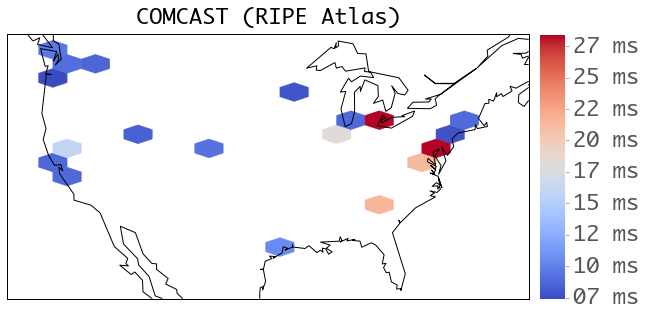

In [155]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,9))
plt.rcParams['font.size'] = 22

m = Basemap (  projection    =    'merc'
             
             , llcrnrlat     =    +24.04529  
             , llcrnrlon     =    -128.82032
             
             , urcrnrlat     =    +49.55921 
             , urcrnrlon     =    -64.90235 
             
             , lat_ts        =    20
             , resolution    =    'c'
            )

m.drawcoastlines()
m.drawmapboundary(fill_color='white')

x,y = m(df_comcast['longitude'].values, df_comcast['latitude'].values)
z = df_comcast['lastmile_median'].values
m.hexbin(  x, y, C=z, gridsize = 15, reduce_C_function = numpy.median, mincnt = 1, cmap = 'coolwarm')

cb = m.colorbar(format='%02d ms')
#cb.set_ticks([1, 2, 4, 8, 16, 32, 64])
nodename = df_comcast['nodename'].values[0]
nodename = nodename.split()[0]
plt.title('%s (RIPE Atlas)'%nodename, fontsize=22, y=1.02)
nodename = nodename.split()[0]
plt.savefig('%s-lastmile-latency-geo-map.pdf'%(nodename), format='pdf', bbox_inches='tight')

In [156]:
def draw_uk_plots(df, cmap):

    plt.style.use('ggplot')
    fig = plt.figure(figsize=(9,7))
    plt.rcParams['font.size'] = 22

    llcrnrlat     =    +48.31559   
    llcrnrlon     =    -8.53932 
    urcrnrlat     =    +58.28890                
    urcrnrlon     =    +3.32592

    m = Basemap (  projection    =    'merc'

                 , llcrnrlat     =    llcrnrlat
                 , llcrnrlon     =    llcrnrlon

                 , urcrnrlat     =    urcrnrlat                
                 , urcrnrlon     =    urcrnrlon

                 , lat_ts        =    20
                 , resolution    =    'c'
                )

    m.drawcoastlines()
    m.drawmapboundary(fill_color='white')
    m.drawcountries()

    x,y = m(df['longitude'].values, df['latitude'].values)
    z = df['lastmile_median'].values

    m.hexbin(  x, y, C=z, gridsize = 15
             , reduce_C_function = numpy.median, mincnt = 1, cmap = cmap)
    cb = m.colorbar(format='%02d ms')
    #cb.set_ticks([1, 2, 4, 8, 16, 32, 64])

    nodename = df['nodename'].values[0]
    nodename = nodename.split()[0]
    plt.title('%s (SamKnows)'%nodename, fontsize=22, y=1.02)
    nodename = nodename.split()[0]
    plt.savefig('%s-lastmile-latency-geo-map.pdf'%(nodename), format='pdf', bbox_inches='tight')

In [157]:
df_bt = df_sk[df_sk.nodename == 'BT (AS2856)']
df_bt = df_bt[df_bt.lastmile_median > 0]
df_bt = df_bt[df_bt.lastmile_median < 64]

In [158]:
df_vm = df_sk[df_sk.nodename == 'VIRGINMEDIA (AS5089)']
df_vm = df_vm[df_vm.lastmile_median > 0]
df_vm = df_vm[df_vm.lastmile_median < 64]

In [159]:
df_ot = df_sk[df_sk.nodename == 'OPALTELECOM (AS13285)']
df_tc = df_sk[df_sk.nodename == 'TISCALI (AS9105)']
df_tt = df_sk[df_sk.nodename == 'TALKTALK (AS43234)']
df_ta = pd.concat([df_ot, df_tc, df_tt])
df_ta['nodename'] = 'TALKTALK'

df_ta = df_ta[df_ta.lastmile_median > 0]
df_ta = df_ta[df_ta.lastmile_median < 64]

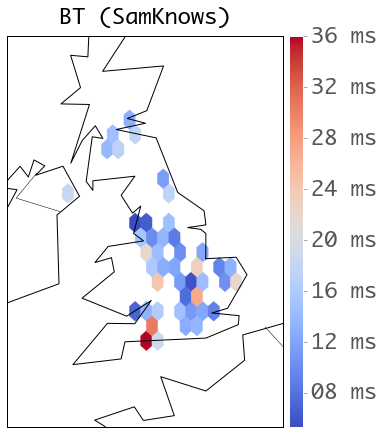

In [160]:
draw_uk_plots(df_bt, cmap = 'coolwarm')

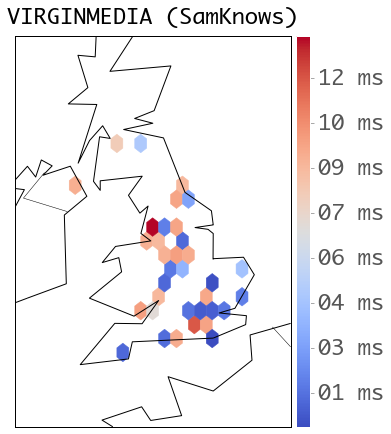

In [161]:
draw_uk_plots(df_vm, cmap = 'coolwarm')

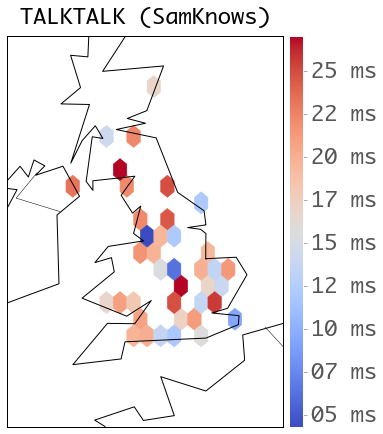

In [162]:
draw_uk_plots(df_ta, cmap = 'coolwarm')

In [163]:
df_fr = df_ra[df_ra.nodename == 'FREE (AS12322)']
df_fr = df_fr[df_fr.lastmile_median > 0]

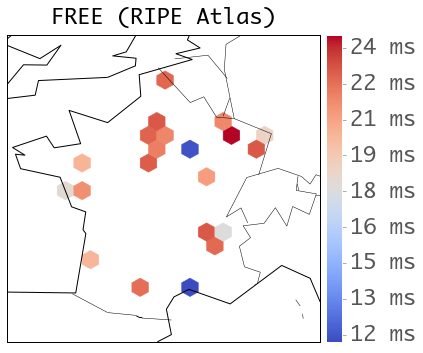

In [164]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(6,9))
plt.rcParams['font.size'] = 22

llcrnrlat     =    +41.61900  
llcrnrlon     =    -05.04945
urcrnrlat     =    +52.11639              
urcrnrlon     =    +10.67711

m = Basemap (  projection    =    'merc'
             
             , llcrnrlat     =    llcrnrlat
             , llcrnrlon     =    llcrnrlon
             
             , urcrnrlat     =    urcrnrlat         
             , urcrnrlon     =    urcrnrlon
             
             , lat_ts        =    20
             , resolution    =    'c'
            )

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.drawcountries()

x,y = m(df_fr['longitude'].values, df_fr['latitude'].values)
z = df_fr['lastmile_median'].values

m.hexbin(  x, y, C=z, gridsize = 15
         , reduce_C_function = numpy.median, mincnt = 1, cmap = 'coolwarm')
cb = m.colorbar(format='%02d ms')
#cb.set_ticks([1, 2, 4, 8, 16, 32, 64])
nodename = df_fr['nodename'].values[0]
nodename = nodename.split()[0]
plt.title('%s (RIPE Atlas)'%nodename, fontsize=22, y=1.02)
nodename = nodename.split()[0]
plt.savefig('%s-lastmile-latency-geo-map.pdf'%(nodename), format='pdf', bbox_inches='tight')